<a href="https://colab.research.google.com/github/maxigaarp/Gestion-De-Datos-en-R/blob/main/Depuracion_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distancias

In [203]:
library(tidyverse)

## Strings

In [208]:
adist("Francisca", "Francisc")

1


In [209]:
Nominanombres=c("Maximiliano", "Ruth", "Luis", "Agata", "Flor", "Gabriel", "Elena", "Alberto")

In [210]:
adist(c("Maximilano", "Rut", "Louis", "Agatha"), Nominanombres)

1,10,9,9,9,8,8,9
11,1,3,4,4,7,5,6
10,4,1,5,5,6,5,7
10,4,6,1,6,7,5,6


In [221]:
adist(c("Maximiliaño"), Nominanombres)

1,11,10,10,10,9,10,10


In [213]:
which.min(adist(c("Louis"), Nominanombres))

[1] 3

In [ ]:
which.min(adist(c("Maximilaño", "Rut", "Louis", "Agatha"), Nominanombres))

[1] 1

La funcion Which.min no esta hecha para aplicarse sobre matrices, solo vectores. Acá se vuelve necesario aplicar funciones a las filas, lo que podriamos hacer con un "for" pero es lento y poco elegante para el ligero cambio que queremos pedirle a R. 

Para estos casos existen las funciones (funcionales) de la familia apply. 

In [219]:
b <- Nominanombres[apply(adist(c("Maximilaño", "Rut", "Louis", "Agatha"), Nominanombres), 1, which.min)]



In [220]:
b

[1] "Maximiliano" "Ruth"        "Luis"        "Agata"

## Puntos


The following objects are masked from tab (pos = 3):

    lat1, lon1, mes, pp


The following objects are masked from tab (pos = 6):

    mes, pp




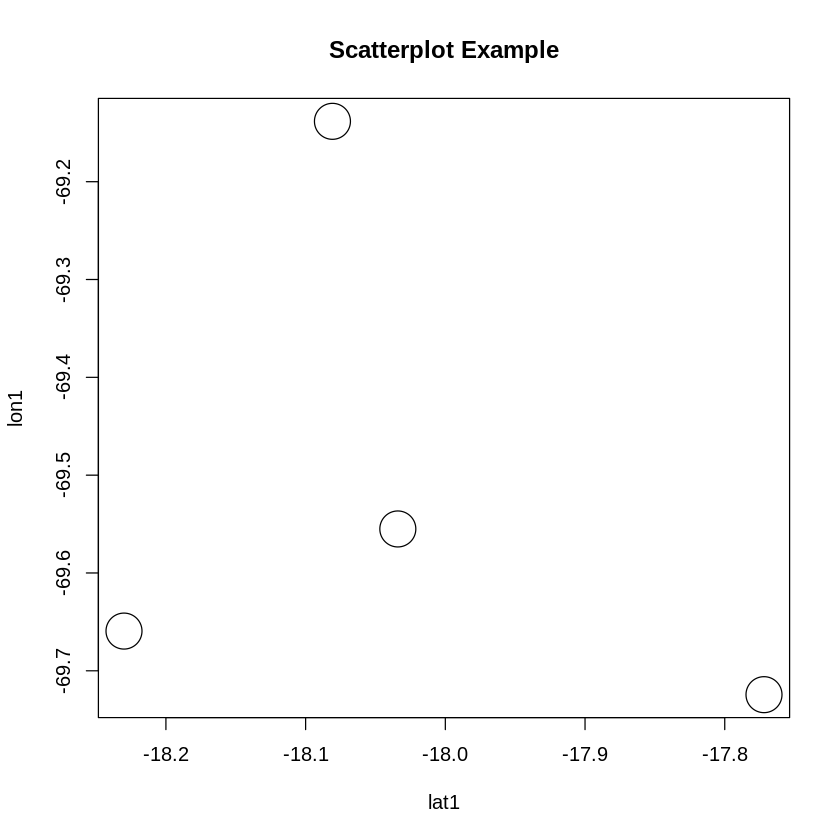

In [222]:
# Simple Scatterplot


d <- c(-17.7719, -69.7244, 1 ,22.3,
       -18.0808 ,	-69.1383, 1 ,23.4, 
       -18.23 ,	-69.6594, 1 ,25.6,
       -18.034 , -69.555, 1,NA)

p <- c(-18.034 , -69.555)
tab <- matrix(d, ncol=4, byrow=TRUE)
colnames(tab) <- c('lat1','lon1',"mes","pp")

d <- c(-18.034 , -69.125)


tab2 <- matrix(d, ncol=2, byrow=TRUE)
colnames(tab2) <- c('lat2','lon2')



tab <- as.data.frame(tab)
tab2 <- as.data.frame(tab2)
attach(tab)
plot(lat1, lon1, main="Scatterplot Example",cex=4)

In [223]:
tab

lat1,lon1,mes,pp
<dbl>,<dbl>,<dbl>,<dbl>
-17.7719,-69.7244,1,22.3
-18.0808,-69.1383,1,23.4
-18.2300,-69.6594,1,25.6
-18.0340,-69.5550,1,NA


In [224]:
df1 <- data.frame(p=c("P1","P2","P3","P4"), x1 = runif(4), y1 = runif(4))
df2 <- data.frame(pr=c("Pr1","Pr2","Pr3"), x2 = runif(3), y2 = runif(3))

In [225]:
df1

p,x1,y1
<chr>,<dbl>,<dbl>
P1,0.6855932,0.2184164
P2,0.2846616,0.9688946
P3,0.8451795,0.2988743
P4,0.4726779,0.8064270


In [226]:
df2

pr,x2,y2
<chr>,<dbl>,<dbl>
Pr1,0.5947057,0.8192551
Pr2,0.4570943,0.7152224
Pr3,0.4652203,0.9796641


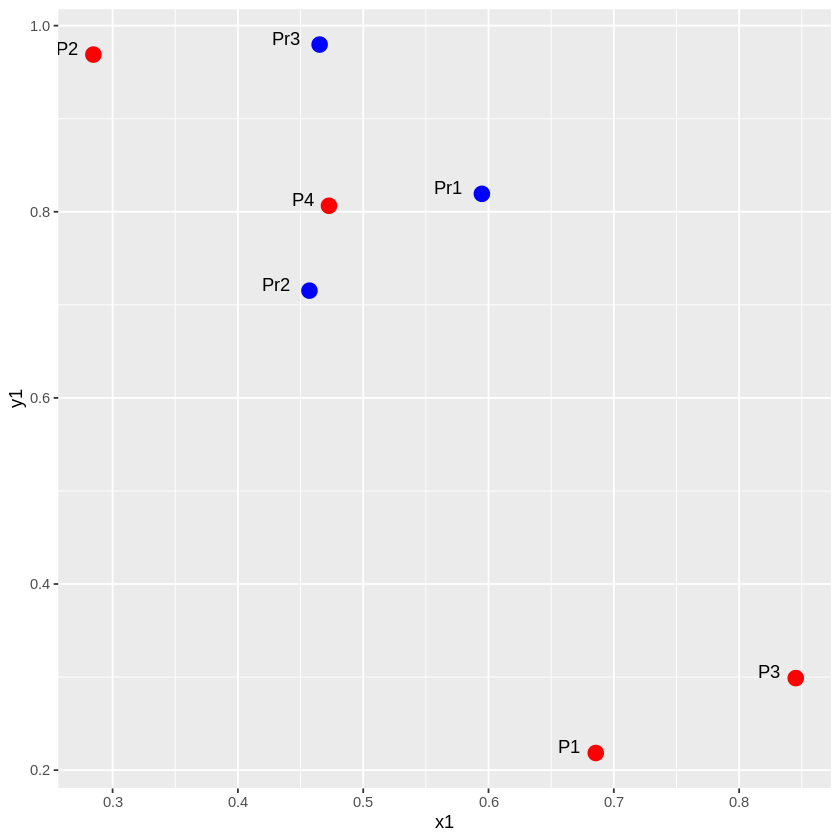

In [227]:
ggplot() +
  geom_point(data = df1, mapping=aes(x = x1, y = y1), color = 'red', size = 4) +
  geom_text(aes(x=df1$x1,y= df1$y1),label=df1$p,hjust=1.7, vjust=0)+
  geom_point(data = df2, 
             mapping = aes(x = x2, y = y2), color="blue", size=4)+
    geom_text(aes(x=df2$x2,y= df2$y2), label = df2$pr, hjust=1.7, vjust=0)
      

In [ ]:
full_df <- df1 %>% 
  crossing(df2) %>%
  mutate(Dist = sqrt((x1-x2)^2+(y1-y2)^2)) %>%
  group_by(p)%>%
  slice(which.min(Dist))
full_df

In [ ]:
full_df <- df1 %>% 
  crossing(df2) %>%
  mutate(Dist = sqrt((x1-x2)^2+(y1-y2)^2)) %>%
  group_by(p)%>%
  filter(Dist==min(Dist))
full_df

ERROR: ignored

In [ ]:
tab2

lat,lon
<dbl>,<dbl>
-18.0340,-69.12500
-18.0808,-69.13836


In [ ]:
tab %>% drop_na()%>%
      crossing(tab2) %>%
      mutate(Dist = sqrt((lat1-lat2)^2+(lon1-lon2)^2)) %>%
      group_by(lat2,lon2)%>%
      mutate(z1=sum(pp/Dist)/sum(1/Dist))%>%
      select(lat2,lon2,z1)%>%
      distinct()

lat2,lon2,z1
<dbl>,<dbl>,<dbl>
-18.034,-69.125,23.4916


# Regresion Lineal

In [ ]:
grasas <- read.table('http://verso.mat.uam.es/~joser.berrendero/datos/EdadPesoGrasas.txt', header = TRUE)
names(grasas)

[1] "peso"   "edad"   "grasas"

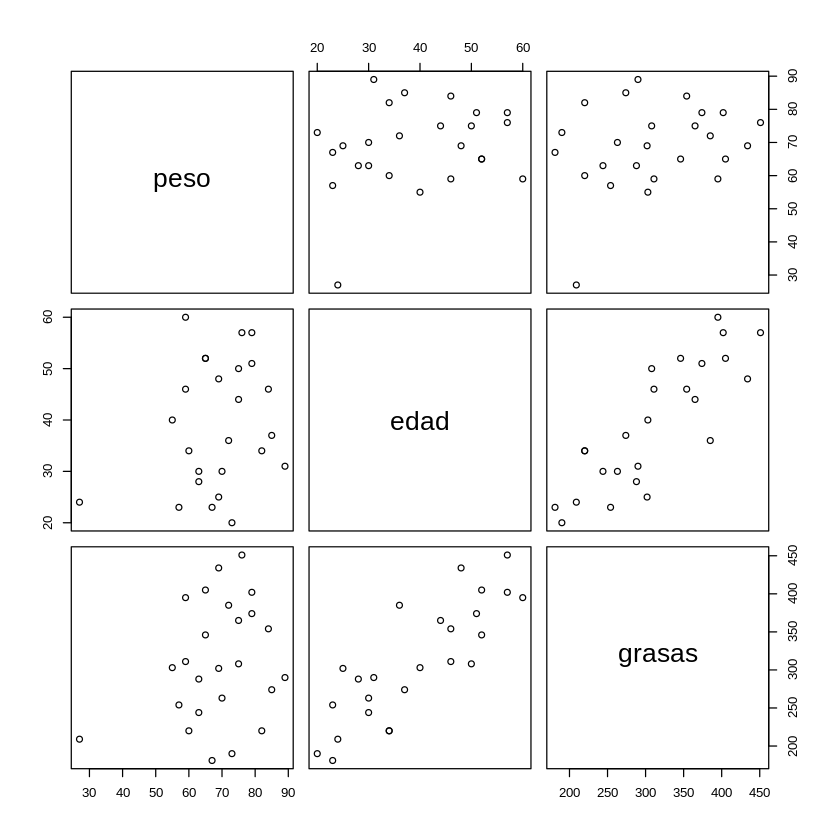

In [ ]:
pairs(grasas)


In [ ]:
cor(grasas)


,peso,edad,grasas
peso,1.0000000,0.2400133,0.2652935
edad,0.2400133,1.0000000,0.8373534
grasas,0.2652935,0.8373534,1.0000000


In [ ]:
regresion <- lm(grasas ~ edad, data = grasas)
summary(regresion)


Call:
lm(formula = grasas ~ edad, data = grasas)

Residuals:
    Min      1Q  Median      3Q     Max 
-63.478 -26.816  -3.854  28.315  90.881 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 102.5751    29.6376   3.461  0.00212 ** 
edad          5.3207     0.7243   7.346 1.79e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 43.46 on 23 degrees of freedom
Multiple R-squared:  0.7012,	Adjusted R-squared:  0.6882 
F-statistic: 53.96 on 1 and 23 DF,  p-value: 1.794e-07


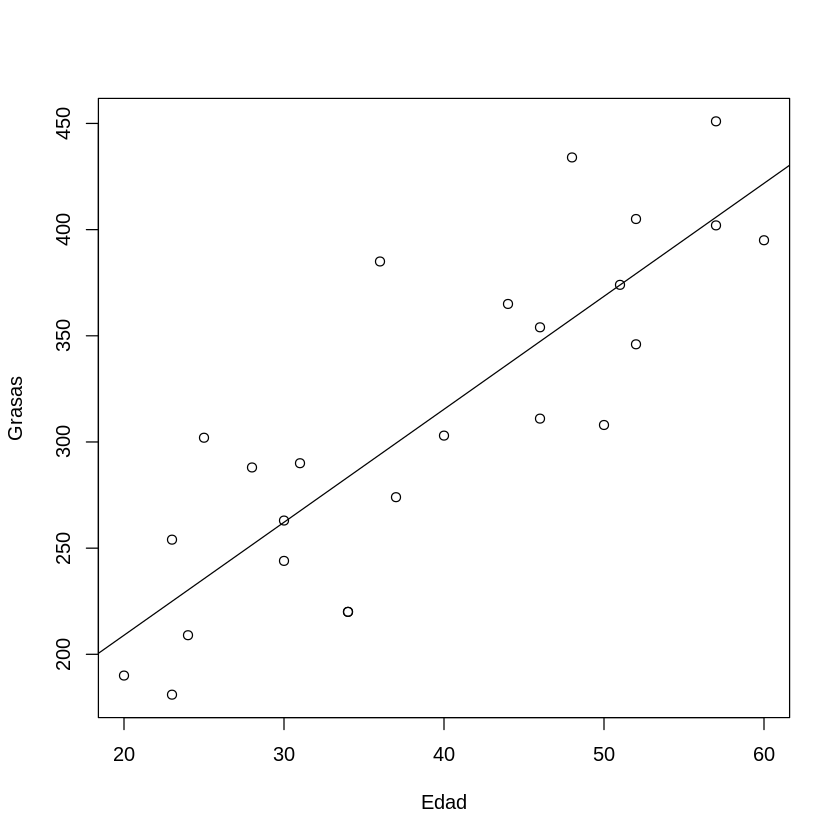

In [ ]:
plot(grasas$edad, grasas$grasas, xlab='Edad', ylab='Grasas')
abline(regresion)

In [ ]:
library(datasets)
data(iris)
iris


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa


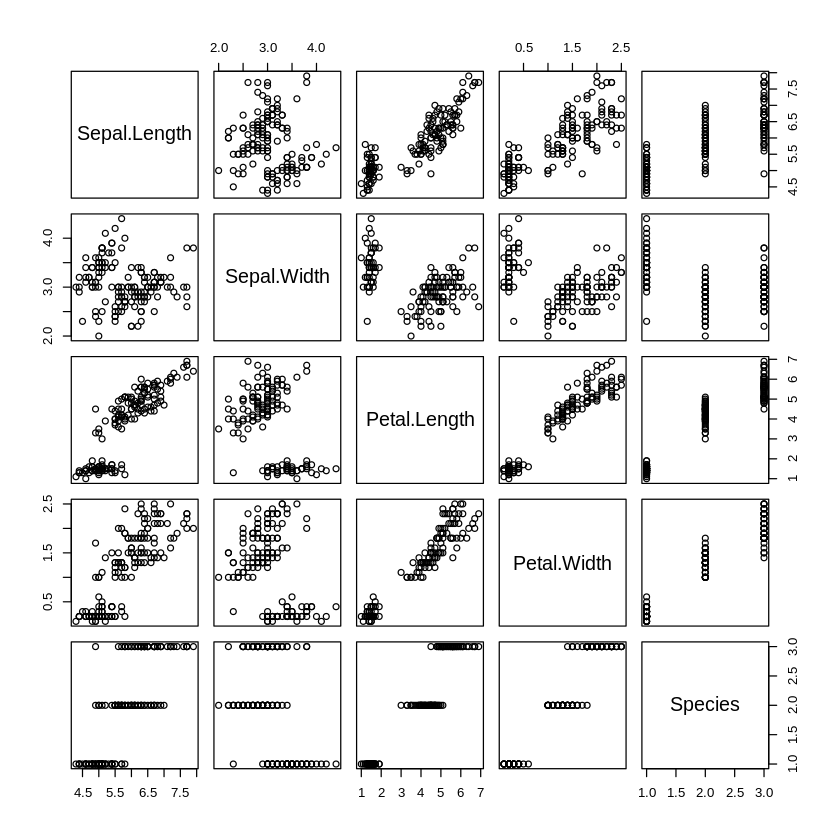

In [ ]:
pairs(iris)

In [ ]:
cor(iris[,1:4])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,-0.1175698,0.8717538,0.8179411
Sepal.Width,-0.1175698,1.0000000,-0.4284401,-0.3661259
Petal.Length,0.8717538,-0.4284401,1.0000000,0.9628654
Petal.Width,0.8179411,-0.3661259,0.9628654,1.0000000


In [ ]:
regresion <- lm(Petal.Length ~ Petal.Width, data = iris)
summary(regresion)


Call:
lm(formula = Petal.Length ~ Petal.Width, data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.33542 -0.30347 -0.02955  0.25776  1.39453 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.08356    0.07297   14.85   <2e-16 ***
Petal.Width  2.22994    0.05140   43.39   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4782 on 148 degrees of freedom
Multiple R-squared:  0.9271,	Adjusted R-squared:  0.9266 
F-statistic:  1882 on 1 and 148 DF,  p-value: < 2.2e-16


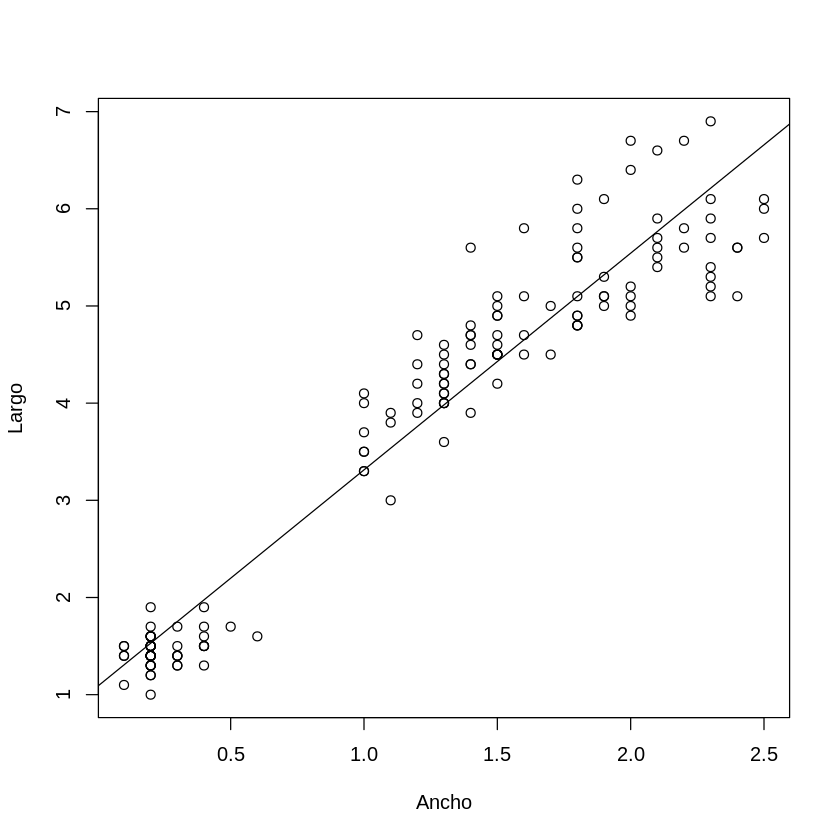

In [ ]:
plot(iris$Petal.Width ,iris$Petal.Length, xlab='Ancho', ylab='Largo')
abline(regresion)

#Normalizacion

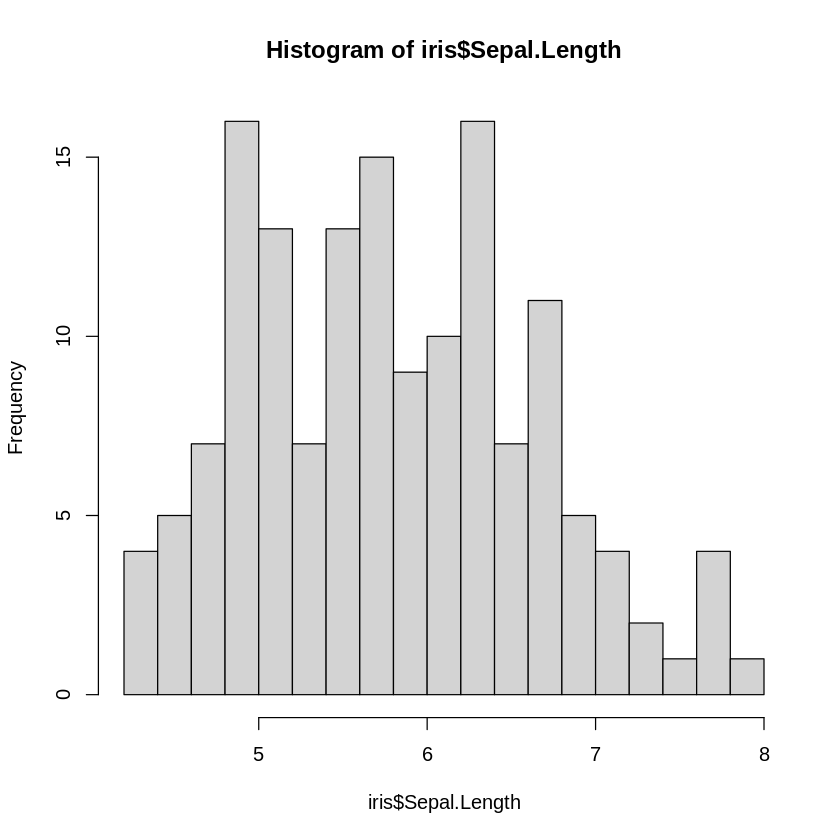

In [ ]:
hist(iris$Sepal.Length, breaks=20)

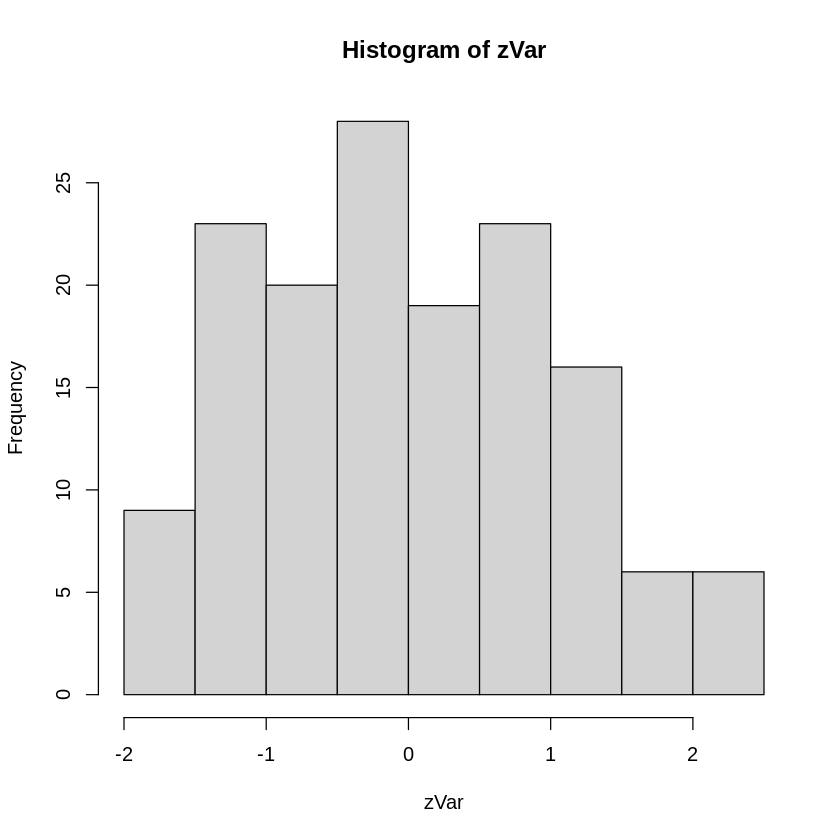

In [ ]:
ISL<-iris$Sepal.Length
zVar <- (ISL - mean(ISL)) / sd(ISL)
hist(zVar)

In [ ]:
iris$Sepal.Length=scale(iris$Sepal.Length)

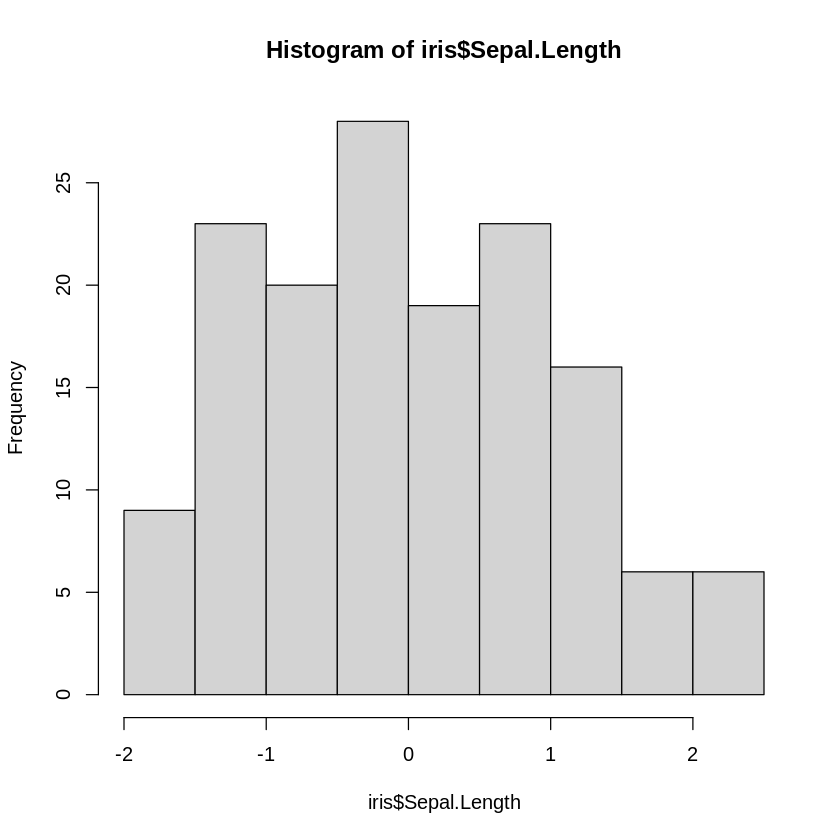

In [ ]:
hist(iris$Sepal.Length)

## Combinado con regresion


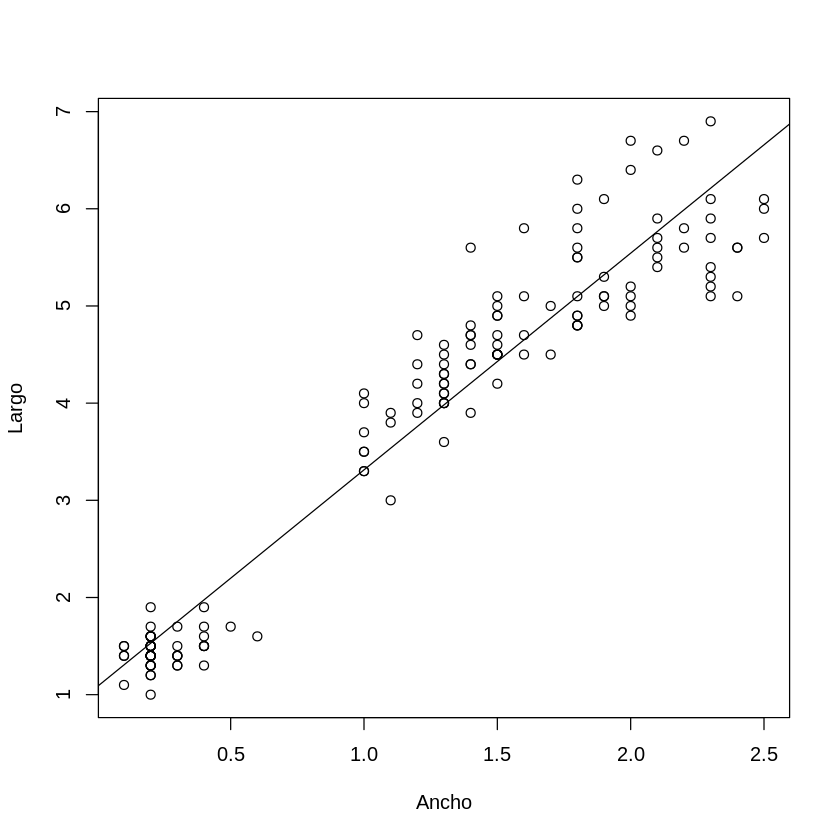

In [ ]:
plot(iris$Petal.Width ,iris$Petal.Length, xlab='Ancho', ylab='Largo')
abline(regresion)

In [ ]:
iris.res = resid(regresion)


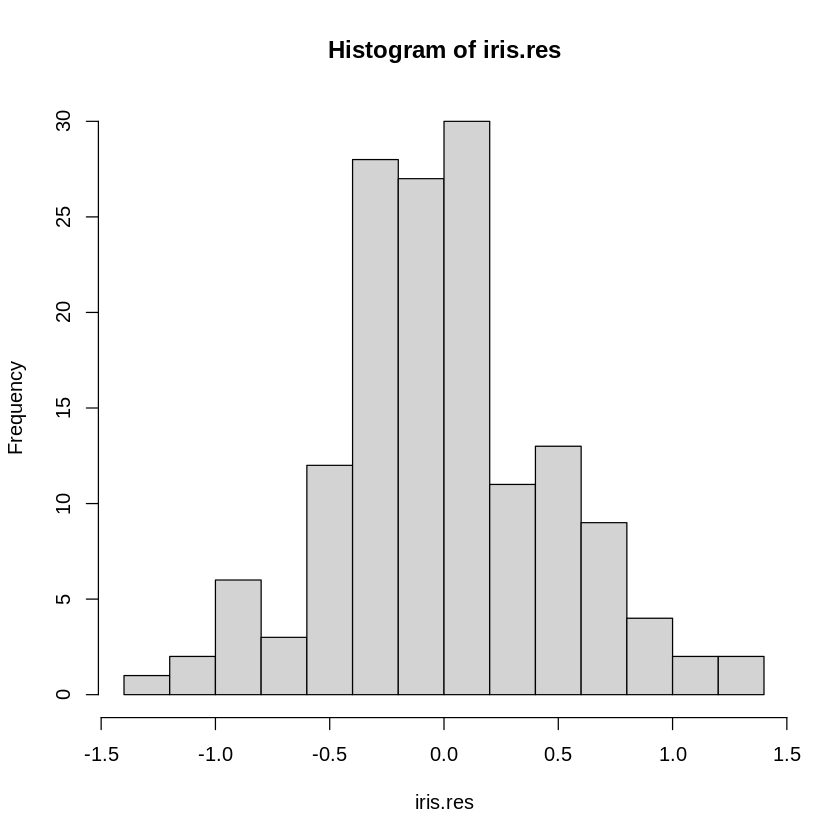

In [ ]:
hist(iris.res, breaks=15)

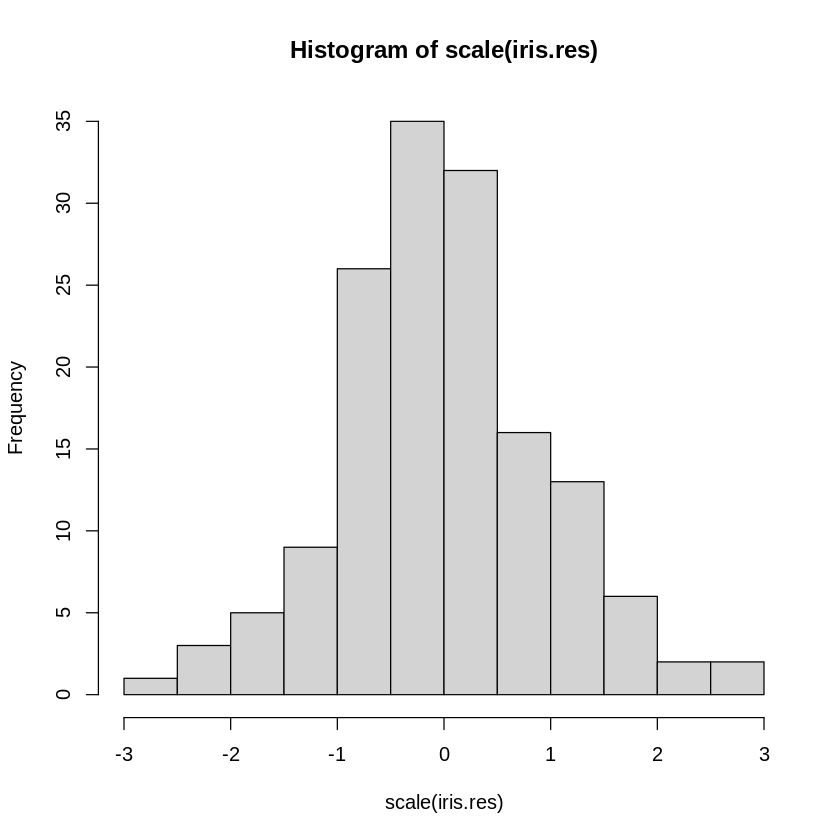

In [ ]:
hist(scale(iris.res))

#Missing Data

In [ ]:
install.packages("missForest")
library(missForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘randomForest’, ‘foreach’, ‘itertools’


Loading required package: randomForest

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.

Loading required package: foreach

Loading required package: itertools

Loading required package: iterators



In [ ]:
library(datasets)

df <- as.data.frame(Nile)


In [ ]:
nile.mis <- prodNA(df, noNA = 0.2)


In [ ]:
nile.mis

x
<ts>
1120
NA
963
1210
1160
1160
813
NA
1370


Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.



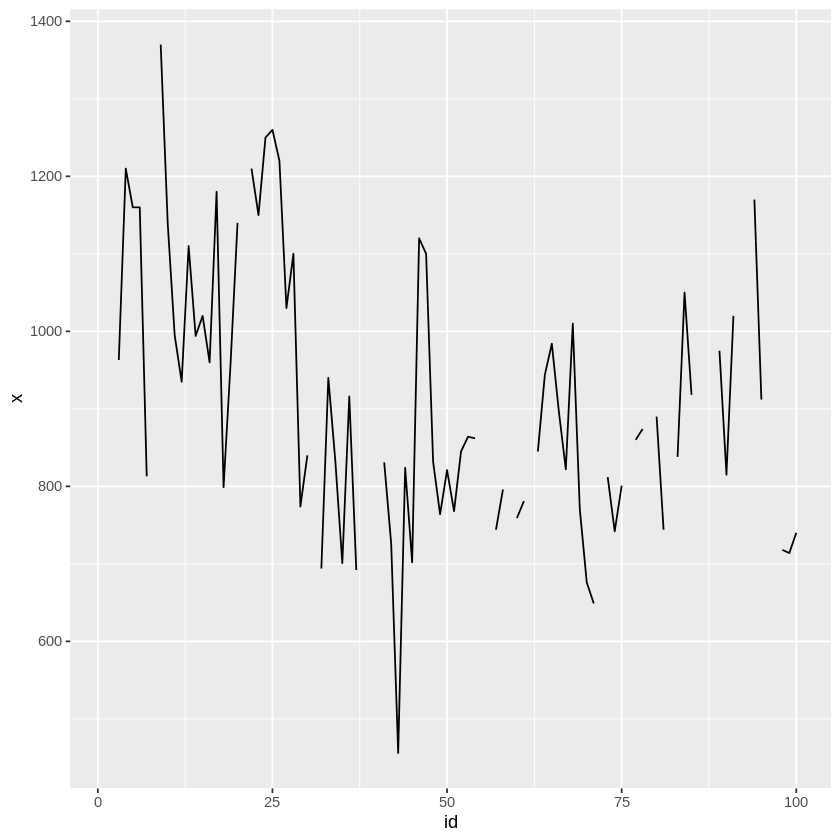

In [ ]:
nile.mis %>% mutate(id = row_number())%>%
          ggplot()+
          geom_line(aes(x=id, y=x))

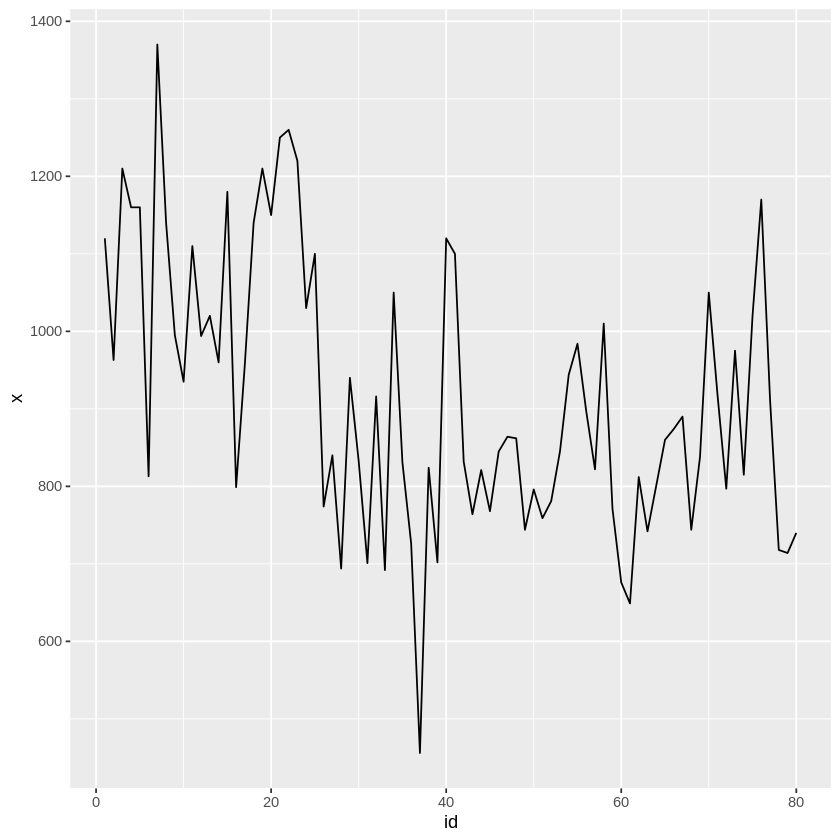

In [ ]:
nile.mis %>% drop_na() %>%
          mutate(id = row_number())%>%
          ggplot()+
          geom_line(aes(x=id, y=x))

Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.



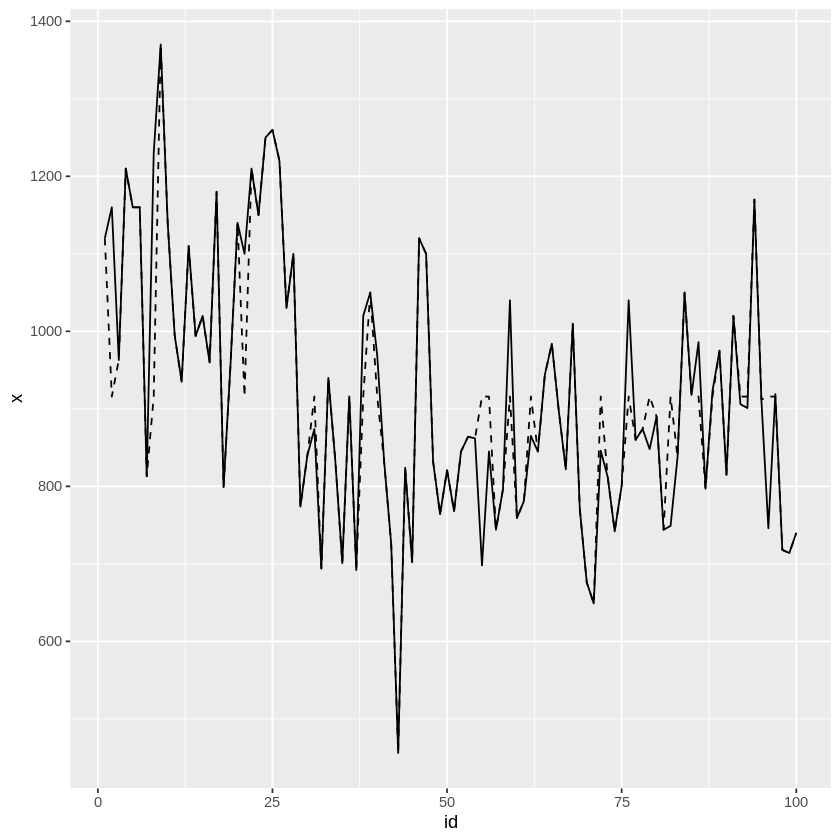

In [ ]:
nile.mis %>% mutate_at("x", function(x) replace(x, is.na(x), mean(x, na.rm = TRUE)))%>%
            mutate(id = row_number())%>%
          ggplot()+
          geom_line(aes(x=id, y=x),linetype = "dashed")+
          geom_line(aes(x=1:100,y=dat$x))


In [ ]:
test2 <- test %>%
  group_by(ID) %>%
  arrange(ID, YEAR_VISIT) %>%
  mutate(x2 = rollmean(x=x, 2)) %>%
ungroup()

In [ ]:
install.packages("zoo")
library(zoo)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.



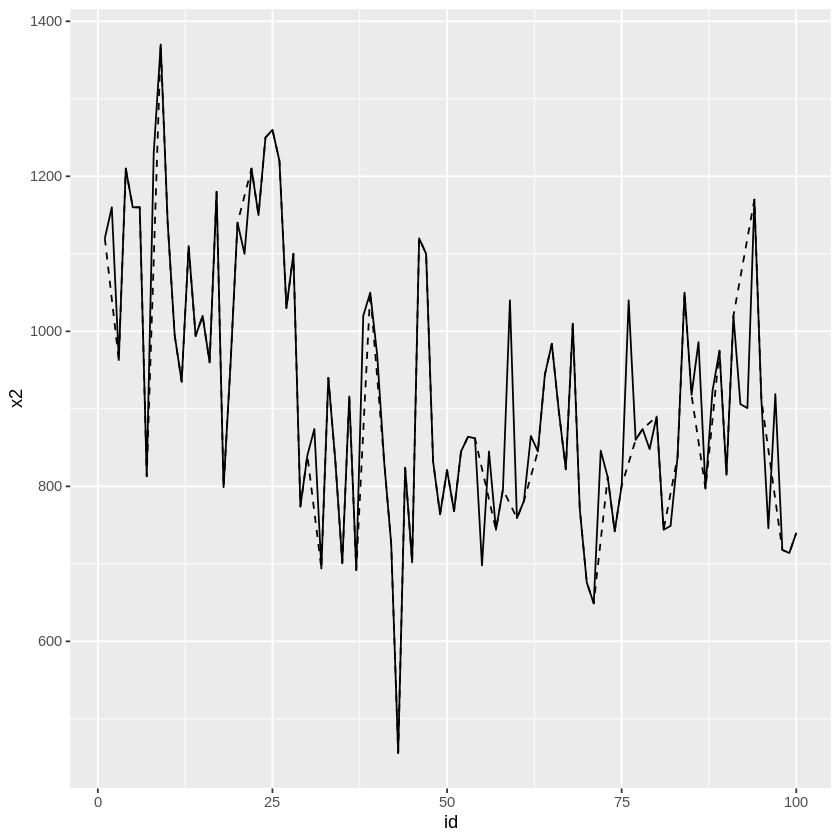

In [ ]:
nile.mis %>% mutate(x2 = na.fill(x,"extend"))%>%
            mutate(id = row_number())%>%
          ggplot()+
          geom_line(aes(x=id, y=x2),linetype = "dashed")+
          geom_line(aes(x=1:100,y=dat$x))


#Interpolacion

In [ ]:
df1 <- data.frame(p=c("P1","P2","P3","P4"), x1 = runif(4), y1 = runif(4))
df1$z1<-NA
df2 <- data.frame(pr=c("Pr1","Pr2","Pr3"), x2 = runif(3), y2 = runif(3), z2=runif(3)*3)
df2$z2 <- df2$x2+df2$y2+runif(3)*0.3

In [ ]:
df1

p,x1,y1,z1
<chr>,<dbl>,<dbl>,<lgl>
P1,0.4606294,0.9671718,NA
P2,0.0466863,0.3307025,NA
P3,0.2431621,0.2150395,NA
P4,0.8116835,0.3505420,NA


In [ ]:
df2

pr,x2,y2,z2
<chr>,<dbl>,<dbl>,<dbl>
Pr1,0.7220362,0.64300795,1.6551002
Pr2,0.6698019,0.88987358,1.7929391
Pr3,0.1186464,0.04676123,0.1757273


In [ ]:
ztarget <- df1$x1+df1$y1
ztarget

[1] 1.4278012 0.3773888 0.4582016 1.1622255

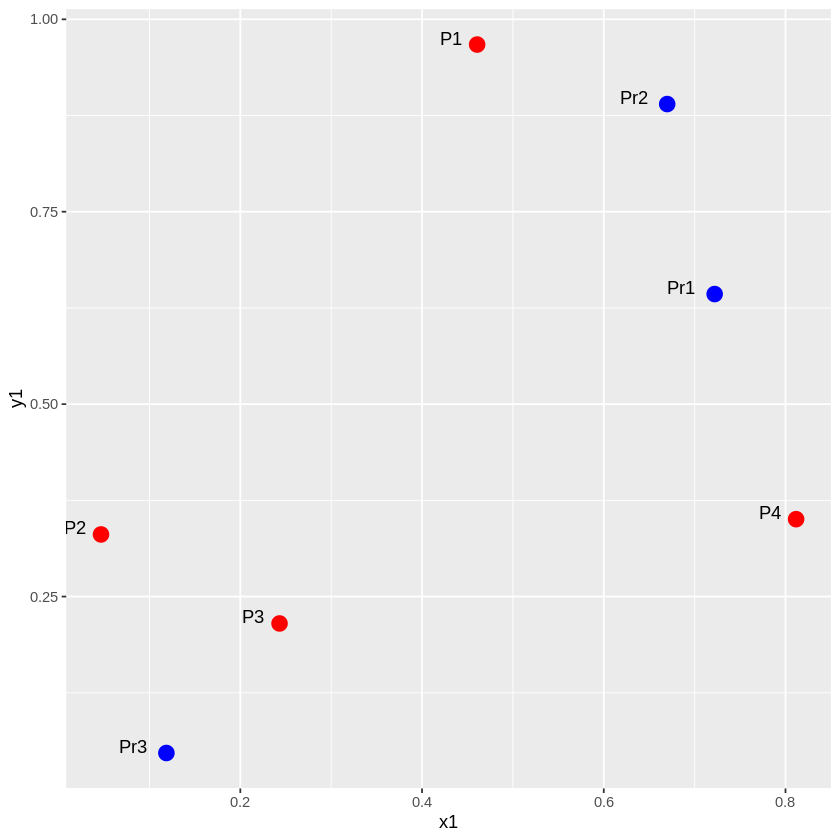

In [ ]:
ggplot() +
  geom_point(data = df1, mapping=aes(x = x1, y = y1), color = 'red', size = 4) +
  geom_text(aes(x=df1$x1,y= df1$y1),label=df1$p,hjust=1.7, vjust=0)+
  geom_point(data = df2, 
             mapping = aes(x = x2, y = y2), color="blue", size=4)+
    geom_text(aes(x=df2$x2,y= df2$y2), label = df2$pr, hjust=1.7, vjust=0)
      

In [ ]:
fulldf1 <- df1 %>% 
  crossing(df2) %>%
  mutate(Dist = sqrt((x1-x2)^2+(y1-y2)^2)) %>%
  group_by(p)%>%
  mutate(z1=sum(z2/Dist)/sum(1/Dist))%>%
  select(p,x1,y1,z1)%>%
  distinct()

# Consistencia

In [ ]:
fulldf1 <- df1 %>% 
  crossing(df2) %>%
  mutate(Dist = sqrt((x1-x2)^2+(y1-y2)^2)) %>%
  group_by(p)%>%
  mutate(z1=sum(z2/Dist)/sum(1/Dist))%>%
  select(p,x1,y1,z1)%>%
  distinct()

In [ ]:
fulldf1

p,x1,y1,z1
<chr>,<dbl>,<dbl>,<dbl>
P1,0.4606294,0.9671718,1.5426855
P2,0.0466863,0.3307025,0.8342718
P3,0.2431621,0.2150395,0.7463468
P4,0.8116835,0.3505420,1.3875635


In [ ]:
df1$z1<-ztarget
df1

p,x1,y1,z1
<chr>,<dbl>,<dbl>,<dbl>
P1,0.4606294,0.9671718,1.4278012
P2,0.0466863,0.3307025,0.3773888
P3,0.2431621,0.2150395,0.4582016
P4,0.8116835,0.3505420,1.1622255


In [ ]:
rbind(df1,fulldf1)

p,x1,y1,z1
<chr>,<dbl>,<dbl>,<dbl>
P1,0.4606294,0.9671718,1.4278012
P2,0.0466863,0.3307025,0.3773888
P3,0.2431621,0.2150395,0.4582016
P4,0.8116835,0.3505420,1.1622255
P1,0.4606294,0.9671718,1.5426855
P2,0.0466863,0.3307025,0.8342718
P3,0.2431621,0.2150395,0.7463468
P4,0.8116835,0.3505420,1.3875635


In [ ]:
rbind(df1,fulldf1) %>% group_by(p) %>%
                        summarise(zfin=mean(z1))

p,zfin
<chr>,<dbl>
P1,1.4852434
P2,0.6058303
P3,0.6022742
P4,1.2748945


# Uniformidad

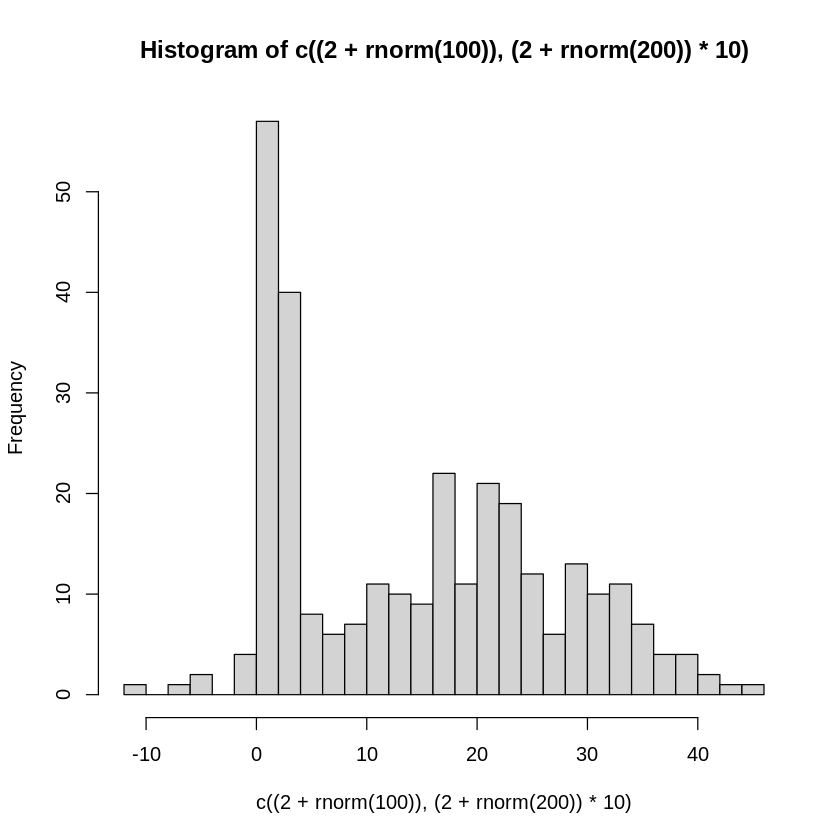

In [197]:
hist(c((2+rnorm(100)),(2+rnorm(200))*10), breaks=25)

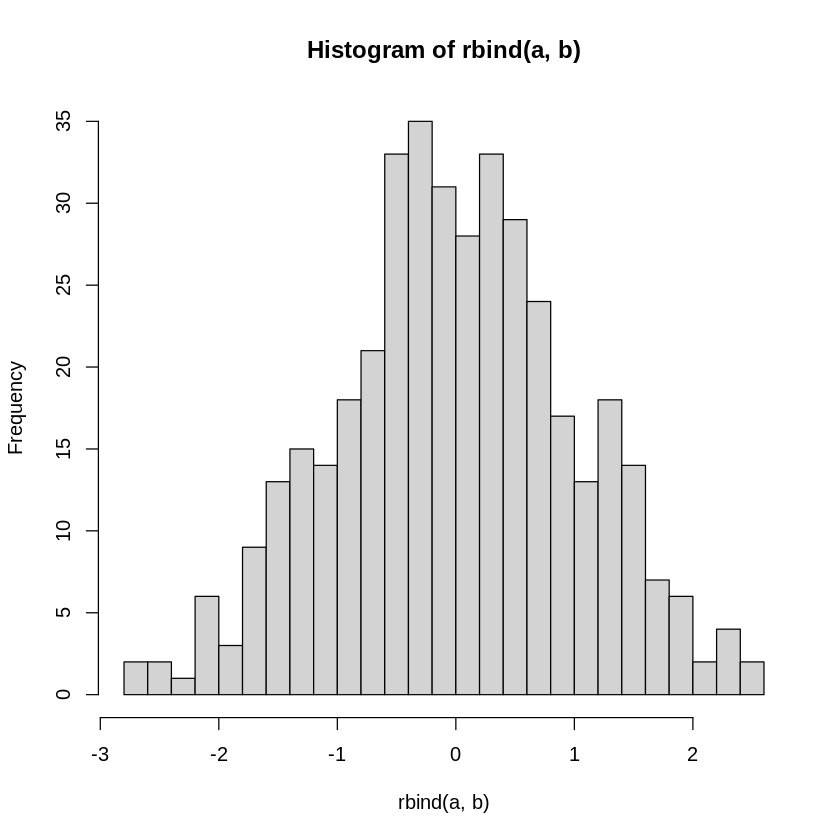

In [202]:
a <- scale((2+rnorm(200))*10)
b <- scale((2+rnorm(200)))
hist(rbind(a,b), breaks=25)

# Datos precipitacion

In [ ]:
unzip("/content/cr2_prAmon_2019.zip")

In [ ]:
x <- read.csv("/content/cr2_prAmon_2019/cr2_prAmon_2019.txt", na = "-9999", header =F)
y <- setNames(as.data.frame(t(x[,-1])),as.character(x[,1]))


In [ ]:
y

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_cuenca,codigo_sub_cuenca,⋯,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
V2,1000005,DGA,dga_web,Visviri,4080,-17.595,-69.4831,10,Altiplanicas,100,⋯,18.8,2.6,6.2,1.2,1.8,0,11.8,14.6,12.8,30.6
V3,1200002,DGA,dga_web,Villa Industrial (Tacora),4080,-17.7719,-69.7244,12,Rio Lluta,120,⋯,13,0.6,2.2,0.4,0.2,0.6,1.4,3.6,2.8,NA
V4,1200003,DGA,dga_web,Humapalca,3980,-17.835,-69.7039,12,Rio Lluta,120,⋯,62,0,0,0,2,0,0,2,11,NA
V5,1201005,DGA,dga_web,Rio Caracarani En Humapalca,3908,-17.8428,-69.6994,12,Rio Lluta,120,⋯,11.8,0.7,8.9,0,0.1,0,0.2,0,5.7,15.2
V6,1201010,DGA,dga_web,Alcerreca,3990,-17.9931,-69.6594,12,Rio Lluta,120,⋯,0,0.3,0.2,0,0.6,0.2,0,0,0,NA
V7,1201003,DGA,dga_web,Rio Lluta En Alcerreca,3550,-18.0036,-69.6331,12,Rio Lluta,120,⋯,9.3,0.3,0.5,0,0.3,0,0,0,0.5,0.9
V8,1001005,DGA,dga_web,Caquena,4400,-18.0542,-69.2017,10,Altiplanicas,100,⋯,26.6,4.8,1.8,0.4,0.2,0,2.6,6.2,8.0,11.2
V9,1110001,DGA,dga_web,Puquios,3750,-18.1747,-69.7439,11,Quebrada De La Concordia,111,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
V10,1202009,DGA,dga_web,Pacollo,4185,-18.1769,-69.5092,12,Rio Lluta,120,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [ ]:
y10 <- y %>% select(c(1,6,7,tail(names(y), 12*10)))
y10 <- y10 %>%
  mutate(countna = rowSums(is.na(y10)))%>%
  filter(countna<5)

In [ ]:
y10 <- data.frame(apply(y10, 2, function(x) as.numeric(as.character(x)))) %>% 
        pivot_longer(cols = X2010.01:X2019.12,
        names_to = c("Año", "Mes"),
        names_pattern = "X(....).(..)")

In [ ]:
y10

codigo_estacion,latitud,longitud,Año,Mes,value
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1000005,-17.595,-69.4831,2010,01,38.3
1000005,-17.595,-69.4831,2010,02,16.0
1000005,-17.595,-69.4831,2010,03,5.0
1000005,-17.595,-69.4831,2010,04,2.0
1000005,-17.595,-69.4831,2010,05,0.0
1000005,-17.595,-69.4831,2010,06,0.0
1000005,-17.595,-69.4831,2010,07,0.0
1000005,-17.595,-69.4831,2010,08,0.0
1000005,-17.595,-69.4831,2010,09,0.0
